In [10]:
import numpy as np
import math
from matplotlib import pyplot as plt
from utils import bsinv
vec_bsinv = np.vectorize(bsinv)
%matplotlib inline
!pip install py_vollib 
import py_vollib
from py_vollib.black_scholes  import black_scholes as bs
from py_vollib.black_scholes.implied_volatility import implied_volatility as iv

In [13]:
# stocks are all martingales.
mu1 = 0;
sigma1 = 0.2;
mu2 = 0;
sigma2= 0.6;
r = 0; 

# time increment
dt = 0.05*1/365;
 
maturity = np.arange(1,3000,10);#% 1:10:2000;
maturity_len = len(maturity);
maturity_max = maturity[-1]; #Get the last element


#derivative of implied vol at ATM
derivative = np.zeros(maturity_len)-10;

#simulate many paths 
num_paths = 20000;

# small number
eps = 0.001;

stock1_paths = np.zeros((num_paths,maturity_max));
stock21_paths = np.zeros((num_paths, maturity_max));
stock22_paths = np.zeros((num_paths, maturity_max));
stock23_paths = np.zeros((num_paths, maturity_max));
stock24_paths = np.zeros((num_paths, maturity_max));

index1 = np.zeros((num_paths, maturity_max));
index2 = np.zeros((num_paths, maturity_max));
index3 = np.zeros((num_paths, maturity_max));
index4 = np.zeros((num_paths, maturity_max));


# initial values
S0stock1=100;
S0stock21=100;
S0stock22=97;
S0stock23=93;
S0stock24=90;
stock1_paths[:,0] = S0stock1;
stock21_paths[:,0] = S0stock21;
stock22_paths[:,0] = S0stock22;
stock23_paths[:,0] = S0stock23;
stock24_paths[:,0] = S0stock24;


# weights for index
w1 = 0.6; 
w2 = 0.4; 
index1[:,0] = w1*stock1_paths[0,0]+ w2*stock21_paths[0,0];
index2[:,0] = w1*stock1_paths[0,0]+ w2*stock22_paths[0,0];
index3[:,0] = w1*stock1_paths[0,0]+ w2*stock23_paths[0,0];
index4[:,0] = w1*stock1_paths[0,0]+ w2*stock24_paths[0,0];


MaturityT=dt*maturity_max; # time to maturity
ndt=math.floor(1/dt); #round 1/dt to an integer

#simulate GBMs
noise1 =  np.sqrt(dt)*np.random.normal(0,1,size=(num_paths,maturity_max));
noise21 =  np.sqrt(dt)*np.random.normal(0,1,size=(num_paths,maturity_max));
noise22 =  np.sqrt(dt)*np.random.normal(0,1,size=(num_paths,maturity_max));
noise23 =  np.sqrt(dt)*np.random.normal(0,1,size=(num_paths,maturity_max));
noise24 =  np.sqrt(dt)*np.random.normal(0,1,size=(num_paths,maturity_max));

W1 = np.cumsum(noise1, axis = 1);
W21 = np.cumsum(noise21, axis = 1);
W22 = np.cumsum(noise22, axis = 1);
W23 = np.cumsum(noise23, axis = 1);
W24 = np.cumsum(noise24, axis = 1);


#simulate stock pths
TT0 = np.multiply(dt,list(range(1,maturity_max+1,1)));
X1 = W1 - 0.5* sigma1**2*TT0;
X21 = W21 - 0.5* sigma2**2*TT0;
X22 = W22 - 0.5* sigma2**2*TT0;
X23 = W23 - 0.5* sigma2**2*TT0;
X24 = W24 - 0.5* sigma2**2*TT0;

#GBMs
stock1_paths[:,1:(maturity_max)]= S0stock1 * np.exp(sigma1*X1[:,0:(maturity_max-1)]);
stock21_paths[:,1:(maturity_max)]= S0stock21 * np.exp(sigma2*X21[:,0:(maturity_max-1)]);
stock22_paths[:,1:(maturity_max)]= S0stock22 * np.exp(sigma2*X22[:,0:(maturity_max-1)]);
stock23_paths[:,1:(maturity_max)]= S0stock23 * np.exp(sigma2*X23[:,0:(maturity_max-1)]);
stock24_paths[:,1:(maturity_max)]= S0stock24 * np.exp(sigma2*X24[:,0:(maturity_max-1)]);


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


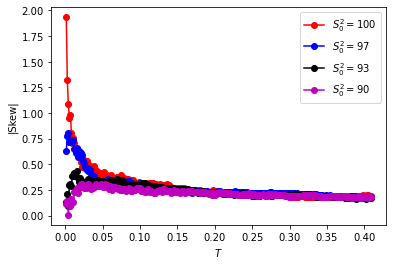

In [14]:
#initiate stocks array
stocks1=np.zeros((num_paths,2));
stocks2=np.zeros((num_paths,2));
stocks3=np.zeros((num_paths,2));
stocks4=np.zeros((num_paths,2));

for j in range(1,maturity_max-1):  #range must be 1---> to end here
 #Compute index1
 stocks1[:,0]=stock1_paths[:,j];
 stocks1[:,1]=stock21_paths[:,j];
 #descending sort
 stocks1=-stocks1;
 stocks1.sort();
 stocks1=-stocks1;
 index1[:,j]=w1*stocks1[:,0]+w2*stocks1[:,1];
 #Compute index2
 stocks2[:,0]=stock1_paths[:,j];
 stocks2[:,1]=stock22_paths[:,j];
 #descending sort
 stocks2=-stocks2;
 stocks2.sort();
 stocks2=-stocks2;
 index2[:,j]=w1*stocks2[:,0]+w2*stocks2[:,1];
 #Compute index3
 stocks3[:,0]=stock1_paths[:,j];
 stocks3[:,1]=stock23_paths[:,j];
 #descending sort
 stocks3=-stocks3;
 stocks3.sort();
 stocks3=-stocks3;
 index3[:,j]=w1*stocks3[:,0]+w2*stocks3[:,1];
 #Compute index4
 stocks4[:,0]=stock1_paths[:,j];
 stocks4[:,1]=stock24_paths[:,j];
 #descending sort
 stocks4=-stocks4;
 stocks4.sort();
 stocks4=-stocks4;
 index4[:,j]=w1*stocks4[:,0]+w2*stocks4[:,1];

    
#derivative of implied vol at ATM
derivative1 = np.zeros((1,maturity_len));
derivative2 = np.zeros((1,maturity_len));
derivative3 = np.zeros((1,maturity_len));
derivative4 = np.zeros((1,maturity_len));

ATM_implied_vol1 = np.zeros((1,maturity_len));
ATM_implied_vol2 = np.zeros((1,maturity_len));
ATM_implied_vol3 = np.zeros((1,maturity_len));
ATM_implied_vol4 = np.zeros((1,maturity_len));

# compute index_hat = E[index_{maturity}|F_0],
# which is the price of index future at 0
index_hat1 = np.zeros((1,maturity_len));
index_hat2 = np.zeros((1,maturity_len));
index_hat3 = np.zeros((1,maturity_len));
index_hat4 = np.zeros((1,maturity_len));

for m in range(0,maturity_len-1):
  index_hat1[0,m]=np.mean(index1[:,maturity[m]]);
  index_hat2[0,m]=np.mean(index2[:,maturity[m]]);
  index_hat3[0,m]=np.mean(index3[:,maturity[m]]);
  index_hat4[0,m]=np.mean(index4[:,maturity[m]]);

for m in range(0,maturity_len-1):
  #compute option price
  #%ATM strike is the price of index future with matrutity maturity(1,m)
  I1 = index_hat1[0,m];
  I2 = index_hat2[0,m];
  I3 = index_hat3[0,m];
  I4 = index_hat4[0,m];
  
  #I = stock1_paths[0,0];
  #% consider two strikes only
  strike1 =np.zeros((1,2))
  strike1[0,0]=I1-eps;
  strike1[0,1]=I1;# [I-eps I];
  strike2 =np.zeros((1,2))
  strike2[0,0]=I2-eps;
  strike2[0,1]=I2;# [I-eps I];strike1 =np.zeros((1,2))
  strike3 =np.zeros((1,2));
  strike3[0,0]=I3-eps;
  strike3[0,1]=I3;# [I-eps I];strike1 =np.zeros((1,2))
  strike4 =np.zeros((1,2))
  strike4[0,0]=I4-eps;
  strike4[0,1]=I4;# [I-eps I];
  log_moneyness1 =np.log(strike1/I1);
  log_moneyness2 =np.log(strike2/I2);
  log_moneyness3 =np.log(strike3/I3);
  log_moneyness4 =np.log(strike4/I4);
  
  strike_len = np.max(strike1.shape);
  implied_vol1 =np.zeros((1,strike_len));
  implied_vol2 =np.zeros((1,strike_len));
  implied_vol3 =np.zeros((1,strike_len));
  implied_vol4 =np.zeros((1,strike_len));
  
  #% time to maturity
  TT = maturity[m]*dt;

  for s in range(0,strike_len):
    #% index option price using Monte Carlo
    payoff_index1 = index1[:,maturity[m]] - strike1[0,s];
    payoff_index1 = payoff_index1[payoff_index1 > 0];
    index_call_price1 = np.sum(payoff_index1)/num_paths;
    payoff_index2 = index2[:,maturity[m]] - strike2[0,s];
    payoff_index2 = payoff_index2[payoff_index2 > 0];
    index_call_price2 = np.sum(payoff_index2)/num_paths;
    payoff_index3 = index3[:,maturity[m]] - strike3[0,s];
    payoff_index3 = payoff_index3[payoff_index3 > 0];
    index_call_price3 = np.sum(payoff_index3)/num_paths;
    payoff_index4 = index4[:,maturity[m]] - strike4[0,s];
    payoff_index4 = payoff_index4[payoff_index4 > 0];
    index_call_price4 = np.sum(payoff_index4)/num_paths;
    
    #%Volatility = blsimpv(Price,Strike,Rate,Time,Value)
    #% compute implied vol, price is now index_hat
    implied_vol1[0,s] = iv(index_call_price1,I1,strike1[0,s],TT,0,'c'); #imp_v = iv(price, S, K, t, r, flag='c','p')
    implied_vol2[0,s] = iv(index_call_price2,I2,strike2[0,s],TT,0,'c'); #imp_v = iv(price, S, K, t, r, flag='c','p')
    implied_vol3[0,s] = iv(index_call_price3,I3,strike3[0,s],TT,0,'c'); #imp_v = iv(price, S, K, t, r, flag='c','p')
    implied_vol4[0,s] = iv(index_call_price4,I4,strike4[0,s],TT,0,'c'); #imp_v = iv(price, S, K, t, r, flag='c','p')
    
    # discret time derivative of implied vol
    #derivative[0,m] = (implied_vol[0,0] - implied_vol[0,1])/(log_moneyness[0,1] - log_moneyness[0,0]);
    derivative1[0,m] = (implied_vol1[0,0] - implied_vol1[0,1])/(log_moneyness1[0,0] - log_moneyness1[0,1]);
    derivative2[0,m] = (implied_vol2[0,0] - implied_vol2[0,1])/(log_moneyness2[0,0] - log_moneyness2[0,1]);
    derivative3[0,m] = (implied_vol3[0,0] - implied_vol3[0,1])/(log_moneyness3[0,0] - log_moneyness3[0,1]);
    derivative4[0,m] = (implied_vol4[0,0] - implied_vol4[0,1])/(log_moneyness4[0,0] - log_moneyness4[0,1]);


plt.plot(maturity[1:(maturity_len-1)]*dt,np.abs(derivative1[0,1:(maturity_len-1)]),'ro-',label=r"$S^2_0 =$"+ str(S0stock21));
plt.plot(maturity[1:(maturity_len-1)]*dt,np.abs(derivative2[0,1:(maturity_len-1)]),'bo-',label=r"$S^2_0 =$"+ str(S0stock22));
plt.plot(maturity[1:(maturity_len-1)]*dt,np.abs(derivative3[0,1:(maturity_len-1)]),'ko-',label=r"$S^2_0 =$"+ str(S0stock23));
plt.plot(maturity[1:(maturity_len-1)]*dt,np.abs(derivative4[0,1:(maturity_len-1)]),'mo-',label=r"$S^2_0 =$"+ str(S0stock24));
plt.legend()
plt.xlabel(r"$T$")
plt.ylabel("|Skew|")
plt.savefig('GBM_2stocks_quasi1.eps', format='eps')
plt.show()


